In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
X.shape

(307, 2)

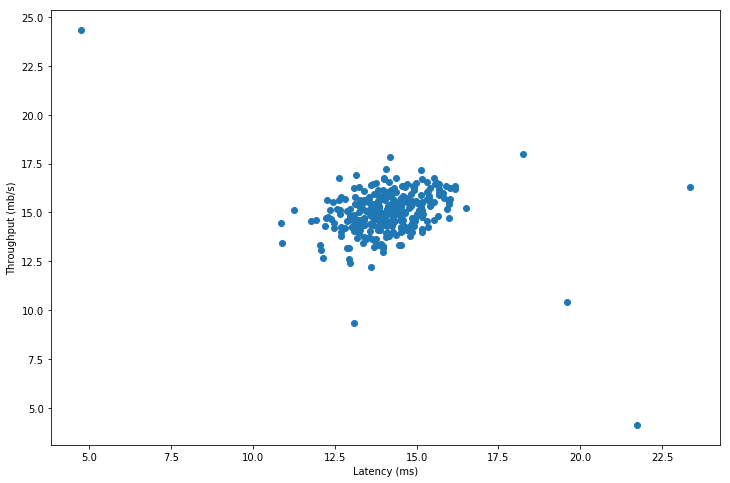

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:, 0], X[:, 1])

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [5]:
def gaussian_estimate(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [6]:
mu, sigma = gaussian_estimate(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [7]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [8]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])
dist.pdf(15)

0.1935875044615038

In [9]:
dist.pdf(X[:, 0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [10]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm(mu[0], sigma[0]).pdf(X[:, 0])
p[:, 1] = stats.norm(mu[1], sigma[1]).pdf(X[:, 1])
p.shape

(307, 2)

In [11]:
pval = np.zeros((X.shape[0], X.shape[1]))
pval[:, 0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:, 0])
pval[:, 1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:, 1])
pval.shape

(307, 2)

In [12]:
def threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    step = (pval.max() - pval.min())/1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        #Calculation for F1 function
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)
        f1 = (2*precision*recall)/(precision + recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
            
    return best_epsilon, best_f1

In [13]:
epsilon, f1 = threshold(pval, yval)
epsilon, f1

/home/rajat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.009566706005956842, 0.7142857142857143)

In [14]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306]),
 array([1, 0, 1, 0, 1, 0, 0, 1]))

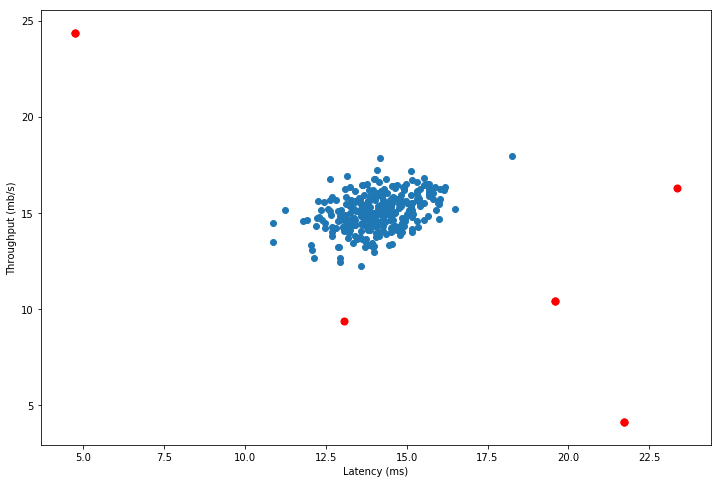

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:, 0], X[:, 1])
# Marking Outliers in Red
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')

In [16]:
data2 = loadmat('ex8data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [17]:
X2 = data2['X']
X2.shape

(1000, 11)

In [18]:
mu2, sigma2 = gaussian_estimate(X2)
mu2, sigma2

(array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
         -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
         -6.2531819 ,   2.32451289,   8.47372252]),
 array([60.97489373, 53.20572186, 58.51546272, 84.20403725, 65.26859177,
        89.57487757, 55.63349911, 87.16233783, 29.62926829, 70.7852052 ,
        50.50356719]))

In [19]:
p2 = np.array(np.zeros(X2.shape))
#type(p2)
p2.shape

(1000, 11)

In [20]:
#Training
p2 = stats.norm(mu2, sigma2).pdf(X2)
p2

array([[0.00654015, 0.00681101, 0.00680383, ..., 0.0134501 , 0.00563081,
        0.00777818],
       [0.00644516, 0.00738443, 0.00679454, ..., 0.01337735, 0.00559703,
        0.00772278],
       [0.00652264, 0.00749795, 0.00681465, ..., 0.01309591, 0.00559946,
        0.00789631],
       ...,
       [0.00654253, 0.00747101, 0.0068151 , ..., 0.0130235 , 0.00560773,
        0.00783147],
       [0.00650376, 0.00749777, 0.00678468, ..., 0.01306547, 0.00563052,
        0.00789141],
       [0.00652452, 0.00748467, 0.00661627, ..., 0.01340484, 0.0056197 ,
        0.00786479]])

In [21]:
#Cross Validation
Xval2 = data2['Xval']
pval2 = np.array(np.zeros(Xval2.shape))
pval2 = stats.norm(mu2, sigma2).pdf(Xval2)
pval2

array([[0.00638819, 0.0074883 , 0.00674082, ..., 0.01338502, 0.00520445,
        0.0078964 ],
       [0.0064848 , 0.00736505, 0.00676508, ..., 0.01329505, 0.00562898,
        0.00783283],
       [0.00645189, 0.00748386, 0.00668461, ..., 0.01323577, 0.00561844,
        0.00785663],
       ...,
       [0.00645299, 0.00742439, 0.00671315, ..., 0.0133209 , 0.0056359 ,
        0.00780685],
       [0.00653211, 0.00749499, 0.00635299, ..., 0.01320549, 0.00563422,
        0.00781115],
       [0.00642921, 0.0073567 , 0.00666857, ..., 0.01321136, 0.00560386,
        0.0078583 ]])

In [22]:
pval2.shape

(100, 11)

In [23]:
yval2 = data2['yval']
Xval2.shape, yval2.shape

((100, 11), (100, 1))

In [24]:
epsilon2, f12 = threshold(pval2, yval2)
epsilon2, f12

/home/rajat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.012420382026040781, 0.18749999999999997)

In [25]:
outliers2 = np.where(p2 < epsilon2)
outliers2

(array([  0,   0,   0, ..., 999, 999, 999]),
 array([ 0,  1,  2, ...,  7,  9, 10]))

In [26]:
# Recommender Systems

In [27]:
mdata = loadmat('ex8_movies.mat')
mdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [28]:
Y = mdata['Y']
R = mdata['R']
Y.shape, R.shape

((1682, 943), (1682, 943))

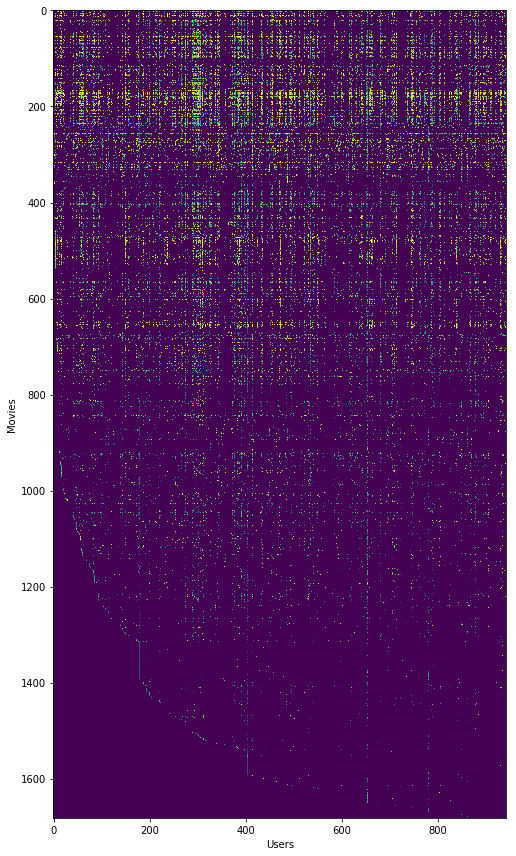

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
fig.tight_layout()

In [37]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    X = np.matrix(np.reshape(params[:num_movies*num_features], (num_movies, num_features)))
    Theta = np.matrix(np.reshape(params[num_movies*num_features:], (num_users, num_features)))
    
    J = 0
    
    #Compute the cost
    error = np.multiply((X*Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1./2)*np.sum(squared_error)
    return J
    

In [38]:
params_data = loadmat('ex8_movieParams.mat')
X = params_data['X']
Theta = params_data['Theta']
X.shape, Theta.shape

((1682, 10), (943, 10))

In [39]:
users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
Theta_sub = Theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

cost(params, Y_sub, R_sub, features)

22.224603725685675

In [40]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    X = np.matrix(np.reshape(params[:num_movies*num_features], (num_movies, num_features)))
    Theta = np.matrix(np.reshape(params[num_movies*num_features:], (num_users, num_features)))
    
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    #Compute the cost
    error = np.multiply((X*Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1./2)*np.sum(squared_error)
    
    X_grad = error*Theta
    Theta_grad = error.T*X
    
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [41]:
J, grad = cost(params, Y_sub, R_sub, features)
J, grad

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [44]:
def cost(params, Y, R, num_features, learning_rate):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    X = np.matrix(np.reshape(params[:num_movies*num_features], (num_movies, num_features)))
    Theta = np.matrix(np.reshape(params[num_movies*num_features:], (num_users, num_features)))
    
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    
    #Compute the cost
    error = np.multiply((X*Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1./2)*np.sum(squared_error)
    
    J = J + ((learning_rate / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((learning_rate / 2) * np.sum(np.power(X, 2)))
    
    # calculate the gradients with regularization
    X_grad = (error * Theta) + (learning_rate * X)
    Theta_grad = (error.T * X) + (learning_rate * Theta)
    
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad 
    

In [45]:
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
J, grad

(31.34405624427422,
 array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
          2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
         -0.89247334,   0.29684395,   1.06300933,   0.66738144,
          0.60252677,   4.90185327,  -0.19747928, -10.13985478,
          2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
         -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
          1.09289758,  -0.40784086,   0.49026541]))

In [50]:
movie_idx = {}
f = open('movie_ids.txt', encoding="ISO-8859-1")
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [51]:
movie_idx[0]

'Toy Story (1995)'